In [1]:
#!pip install --upgrade https://github.com/HIPS/autograd/archive/master.zip

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.linalg import norm

In [3]:
import autograd.numpy as anp

def softplus(x): # = log(1 + exp(x))
    lt_34 = (x >= 34)
    gt_n37 = (x <= -36.8)
    neither_nor = anp.logical_not(anp.logical_or(lt_34, gt_n37))
    rval = anp.where(gt_n37, 0., anp.log(1 + anp.exp(x)))

    rval = anp.where(lt_34, x, rval) 
    #print(rval)
    return rval

def log_loss(x):
    return softplus(-x)

def logsigmoid(x): return x - anp.logaddexp(0, x)

def sigmoid(x): return anp.exp(x - anp.logaddexp(0, x))

In [4]:
def zero_one(t):
    return 1.*(t<=0)

def loss_zero_one(t, y, thresholds):
    score = t
    K = len(thresholds)+1
    signs = 2.*(y <= np.arange(1,K)[np.newaxis,:]) - 1
    S = thresholds[anp.newaxis,:] - score[:,anp.newaxis]
    return anp.sum(zero_one(S*signs), axis=1)

In [5]:
def surrogate_loss_logistic(t, y, thresholds):
    score = t
    K = len(thresholds)+1
    signs = 2.*(y <= np.arange(1,K)[np.newaxis,:]) - 1
    S = thresholds[anp.newaxis,:] - score[:,anp.newaxis]
    return anp.sum(log_loss(S*signs), axis=1)

In [6]:
def surrogate_loss_proportional_odds(t, y, thresholds):
    score = t
    K = len(thresholds)+1
    signs = 2.*(y <= np.arange(1,K)[np.newaxis,:]) - 1
    S = thresholds[anp.newaxis,:] - score[:,anp.newaxis]
    if y == 1:
        return -logsigmoid(thresholds[y-1]-t)
    elif y == len(thresholds)+1: # ==K
        return -logsigmoid(t-thresholds[y-2]) # 1 + 0*t #
    else:
        return -anp.log(sigmoid(thresholds[y-1]-t) - sigmoid(thresholds[y-2]-t))

In [7]:
thresholds = np.array([-4.1, -3.3, -1.6, -.7, .2, .6, 2.2, 3.9])

In [8]:
K = len(thresholds)+1

In [9]:
t = np.linspace(-5,5,1000)

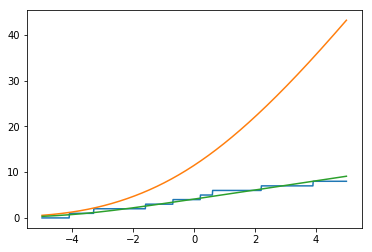

In [10]:
y = 1
plt.plot(t, loss_zero_one(t, y, thresholds), t, surrogate_loss_logistic(t, y, thresholds), t, surrogate_loss_proportional_odds(t, y, thresholds))
plt.show()

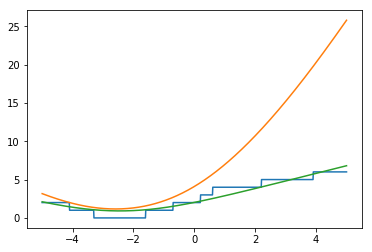

In [11]:
y = 3
plt.plot(t, loss_zero_one(t, y, thresholds), t, surrogate_loss_logistic(t, y, thresholds), t, surrogate_loss_proportional_odds(t, y, thresholds))
plt.show()

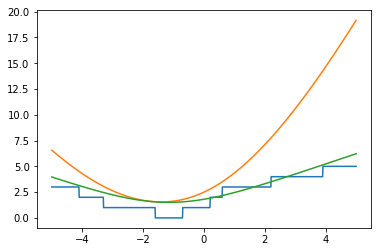

In [12]:
y = 4
plt.plot(t, loss_zero_one(t, y, thresholds), t, surrogate_loss_logistic(t, y, thresholds), t, surrogate_loss_proportional_odds(t, y, thresholds))
plt.show()

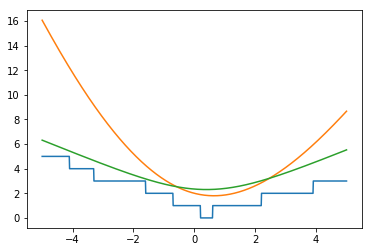

In [13]:
y = 6
plt.plot(t, loss_zero_one(t, y, thresholds), t, surrogate_loss_logistic(t, y, thresholds), t, surrogate_loss_proportional_odds(t, y, thresholds))
plt.show()

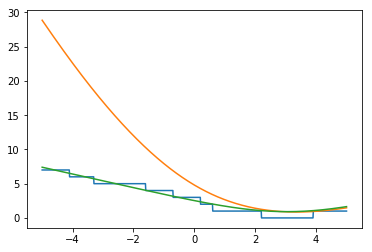

In [14]:
y = K-1
plt.plot(t, loss_zero_one(t, y, thresholds), t, surrogate_loss_logistic(t, y, thresholds), t, surrogate_loss_proportional_odds(t, y, thresholds))
plt.show()

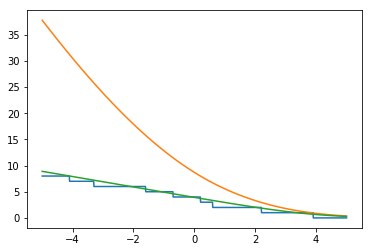

In [15]:
y = K
plt.plot(t, loss_zero_one(t, y, thresholds), t, surrogate_loss_logistic(t, y, thresholds), t, surrogate_loss_proportional_odds(t, y, thresholds))
plt.show()